## Imports des modules

In [1]:
from scipy.misc import imread
from sklearn.externals import joblib

import random as rand
import numpy as np 
import cv2
import glob
import time

import matplotlib.pyplot as plt
%matplotlib inline

from helpers import convert, show_images, put_boxes, box_boundaries
from featuresourcer import FeatureSourcer
from binaryclassifier import BinaryClassifier
from slider import Slider
from heatmap import HeatMap 

import warnings
warnings.filterwarnings('ignore')

## Initialisation paramètres

In [2]:
svc = joblib.load('models/svc2.pkl')
scaler = joblib.load('models/scaler2.pkl')

sourcer_params = {
    'bounding_box_size': 128,
    'cells_per_block': 2,
    'color_model': 'hsv',
    'number_of_orientations': 12,
    'pixels_per_cell': 16
}

cls = BinaryClassifier(svc, scaler)
src = FeatureSourcer(sourcer_params)
slider = Slider(sourcer=src, classifier=cls, increment=8)

frame1 = imread("datasets/full/other/Butterfly/original.jpeg?1532741436.jpg")
frame2 = imread("datasets/full/other/Bee/bbabfdf4-3be0-4210-bd01-8c6f3b16d002_image.jpg")
frame3 = imread("datasets/full/other/Mosquito/248aad4e-e34c-4996-ab46-b28c873232e1.jpg")
frame4 = imread("datasets/full/other/Fly/8820c3a0-e1a5-4dd4-a4d7-3b2855f91875_image.jpg")
frame5 = imread("datasets/full/other/Fly/58418.jpg")
frame6 = imread("datasets/full/other/Mosquito/385f2d78-7de5-4cbc-8226-c09a9ca9aa1f.jpg")

In [3]:
def generate_wp(frame, nb_div):
    wp = []
    height = frame.shape[0]
    for i in range(nb_div):
        wp.append(height//nb_div * i)
    return wp

def generate_ws(frame, nb_div):
    total_size = min(frame.shape[0], frame.shape[1])
    ws = []
    for i in range(1, nb_div + 1):
        ws.append(total_size//nb_div * i)
    return ws

In [4]:
def heatmap_test(this_frame, nb_div):
    this_heatmap = HeatMap(frame=this_frame)
    
    window_position = []
    window_size = []

    for pos in generate_wp(this_frame, nb_div):
        for size in generate_ws(this_frame, nb_div):
            window_position.append(pos)
            window_size.append(size)

    for sz, pos in zip(window_size, window_position):
        bounding_boxes = slider.locate(frame=this_frame, window_size=sz, window_position=pos)
        this_heatmap.update(bounding_boxes)

    this_heatmap.show(this_frame)

## Calcul de la heatmap pour quelques images

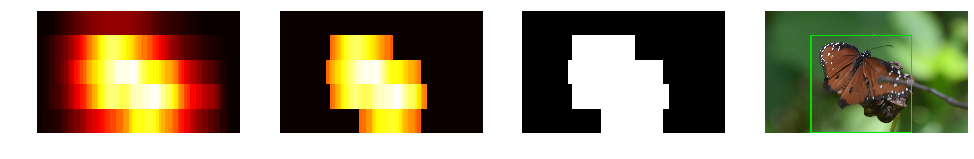

In [5]:
heatmap_test(frame1, 5)

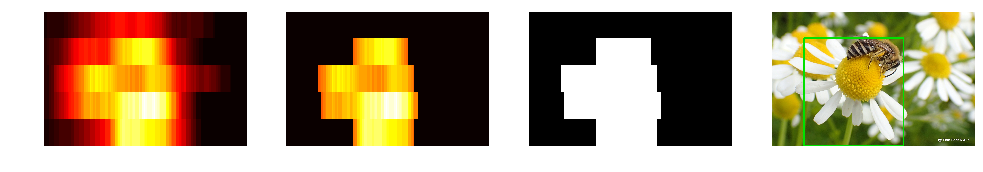

In [6]:
heatmap_test(frame2, 5)

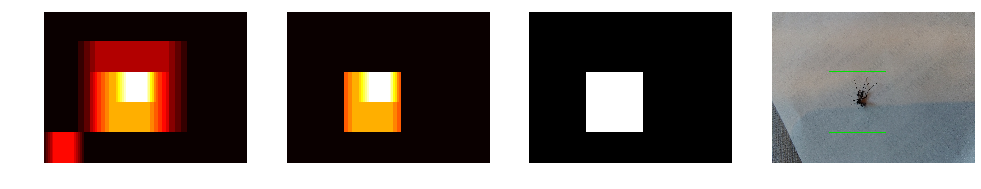

In [7]:
heatmap_test(frame3, 5)

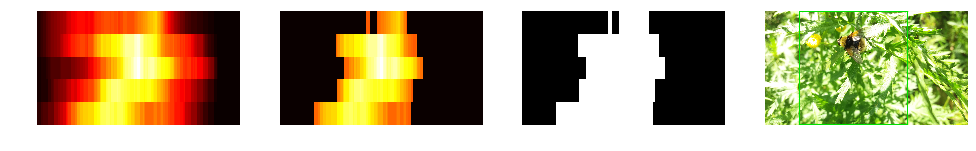

In [8]:
heatmap_test(frame4, 5)

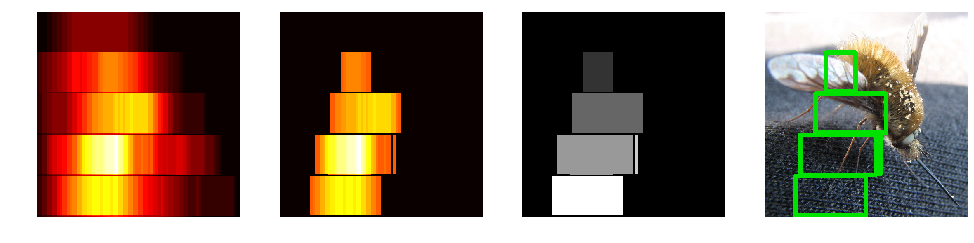

In [9]:
heatmap_test(frame5, 5)

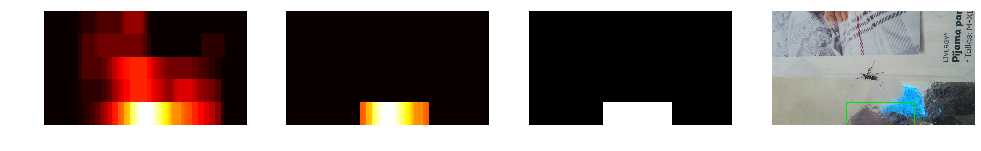

In [10]:
heatmap_test(frame6, 5)